# EEE571 Extra Credit Problem: SymPy Solution for Circuit Analysis

This JupyterLab notebook provides a step-by-step symbolic solution using SymPy for the 3-phase parallel RLC circuit in the Extra Credit Problem. The circuit is a three - phase circuit and has per phase: 

AC source: 
$$
10\sqrt{3}\; \left[kV\right]\; Line\;to\;Line \;RMS
$$
$$
\omega=377 \left[\frac{rad}{s}\right]
$$

The source is connected with parallel comnination of R ($1\; \Omega$), L ($j1\; \Omega$ reactance), C ($100$ MVA total rating). <br>

We have the following circuit conditions:
Pre-switching: steady-state.  For this state, we will compute the initial conditions using phasor analysis.

Post-switching (S opens at $i_{total} = 0$): For the state when the switch opens at the source current equal to 0A, we have free parallel RLC oscillations. 

We will plot $v_C(t)$ and $i_L(t)$ to visualize each waveform.

## Imports and Setup

In [1]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from sympy import I, Abs, sqrt, exp, cos, sin, symbols, re, pi, arg
sp.init_printing(use_unicode=True)

# Analysis Steps

## Step 1: Derive Circuit Parameters

In this step, we symbolically define the given parameters and derive the per-phase capacitance $C$, inductance $L$, and capacitive reactance $X_C$. The source is line-to-line RMS voltage $V_{LL,rms} = 10\sqrt{3}$ kV at $\omega = 377$ rad/s. Capacitor rating is $100$ MVA (3-phase), inductor $j1 \Omega$, resistor $R=1 \Omega$.

Per phase: $V_{ph\_rms} = V_{LL\_rms}/\sqrt{3}$, $Q_{C\_ph} = 100/3$ MVA, $X_C = V_{ph\_rms}^2 / Q_{C\_ph}$, $L = 1/\omega$, $C = 1/(\omega X_C)$.

In [2]:
omega = symbols(r'\omega', real=True, positive=True)
R = symbols('R', real=True, positive=True)

XL = symbols('X_L', real=True, positive=True)
XC = symbols('X_C', real=True, positive=True)

V_llrms = symbols('V_llrms', real=True, positive=True)
Q_c3ph = symbols('Q_c3ph', real=True, positive=True)

L = XL / omega
C = 1 / (omega * XC)

### RMS Phase Voltage

In [3]:
V_ph_rms = V_llrms / sp.sqrt(3)
V_ph_rms

### Per Phase Capacitor Reactive Power Capacity

In [4]:
Q_cph = Q_c3ph / 3
Q_cph

### Capacitive Reactance Equation

In [5]:
Xc_eq = (V_ph_rms)**2 / Q_cph
Xc_eq

### Inductance Equation

In [6]:
L_eq = XL / omega
L_eq

### Capacitance Equation

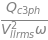

In [7]:
C_eq = 1 / (omega * Xc_eq)
C_eq

### Substitute Values to Calculate Capacitive Reactance

In [8]:
numerical_subs = {omega: 377, R: 1, XL: 1, V_llrms: 10e3*sp.sqrt(3), Q_c3ph: 100*10**6}
numerical_subs

In [9]:
calc_Xc = Xc_eq.subs(numerical_subs).doit().evalf()
calc_Xc

### Display Results of Calculating Inductance, Capacitance and Capacitive Reactance

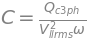

Numerical C = 8.84e-4 F (884 μF)
Numerical L = 2.65e-3 H
Numerical X_C = 3.00 Ω


In [10]:
display(sp.Eq(sp.symbols('C'), C_eq))  # Symbolic expression
C_num = C_eq.subs(numerical_subs).doit().evalf()
print(f"Numerical C = {C_num:.2e} F ({C_num*1e6:.0f} μF)")
L_num = L_eq.subs(numerical_subs).doit().evalf()
print(f"Numerical L = {L_num:.2e} H")
Xc_num = Xc_eq.subs(numerical_subs).doit().evalf()
print(f"Numerical X_C = {Xc_num:.2f} Ω")

**Output (Symbolic):**

$$ C = \frac{Q_{c3ph}}{V_{llrms}^{2} \omega} $$

**Numerical Values:**  
$$ C \approx 8.84 \times 10^{-4}\; \left[F\right]\; \left(884\;μF\right) $$
$$ L \approx 2.65 \times 10^{-3}\;\left[H \right] $$
$$ X_C = 3 \; \left[Ω\right] $$
$$ V_{ph\_rms} = 10000 \left[V\right] $$

## Step 2: Steady-State Analysis (Pre-Switching Phasors)

Steady-state ($t<0$): 

Admittances: 
$$
Y_R=1/R
$$

$$ 
Y_L=1/(j X_L)
$$

$$ 
Y_C=j/ X_C
$$ 

$$
Y_{total} = Y_R + Y_L + Y_C
$$

$$
I_{total\_rms} = V_{ph\_rms} \times Y_{total} \left(V_ph ∠0° initial\right)
$$

Switch at $i_{total}=0$: 

Adjust $V_{ph}$ phase:

$$
\theta = \frac{\pi}{2} - \angle{Y_{total}}
$$

Therefore:
$$
\angle{I_{total}} = \frac{\pi}{2}
$$

$$
i\left(t\right)=I_{peak} cos\left(\omega t + \frac{\pi}{2}\right) = -I_{peak} sin\left(\omega t\right), zero\;at\;t=0)
$$

and:
    
$$
v\left(0\right) = \sqrt{2} Re\left[V_{ph\_rms} e^{jθ}\right]
$$

$$
i_{L}\left(0\right) = \sqrt{2} Re\left[\frac{V_{ph\_rms} e^{jθ}}{j X_L}\right].
$$

### Inductive Impedance

In [11]:
Z_L = sp.I * XL
Z_L

### Inductive Admittance

In [12]:
Y_L = 1 / Z_L
Y_L

### Resistive Admittance

In [13]:
Y_R = 1 / R
Y_R

### Capacitive Admittance

In [14]:
Y_C = 1 / (-I * XC)
Y_C

### Total Admittance

In [15]:
Y_total = Y_R + Y_L + Y_C
Y_total

### Calculate Total RMS Load Current

In [16]:
I_total_rms = V_ph_rms * Y_total
I_total_rms

### Calculate Load Phase Angle

In [17]:
angle_Y = sp.arg(Y_total)
angle_Y

### Correct Phase Angle for Switch Closing at Source Current = 0A

In [18]:
theta = pi / 2 - angle_Y
theta

### Phase Voltage in Phasor Form

In [19]:
V_ph_adjusted = V_ph_rms * exp(I * theta)
V_ph_adjusted

### Magnitude of Phase Voltage

In [20]:
v0_sym = sqrt(2) * sp.re(V_ph_adjusted)
v0_sym

### Calculate RMS Inductor Current

In [22]:
I_L_rms = V_ph_adjusted / Z_L
I_L_rms

In [23]:
i_L0_sym = sp.sqrt(2) * sp.re(I_L_rms)
i_L0_sym

In [24]:
# Symbolic
display(sp.Eq(symbols(r'\angle\;Y_{total}'), angle_Y))
display(sp.Eq(symbols(r'\theta'), theta))

In [25]:
# Numerical
subs_num = numerical_subs.copy()
subs_num

In [26]:
# Restate Xc in ohms
Xc_num

In [27]:
subs_num.update({XC: Xc_num})
subs_num

### Substitute into $V_0$ and Evaluate

In [28]:
v0_sym

In [29]:
v0_num = float(v0_sym.subs(subs_num).doit().evalf())
v0_num

In [30]:
i_L0_num = float(i_L0_sym.subs(subs_num).doit().evalf())
i_L0_num

### Phase Angle of Load Impedances $\angle Y$ in $\left[degrees\right]$:

In [31]:
angle_Y_num = float(angle_Y.subs(subs_num).doit().evalf() * 180 / sp.pi)
angle_Y_num

### Phase of Voltage $\theta_V$ in $\left[degrees\right]$:

In [32]:
theta_num = float(theta.subs(subs_num).doit().evalf() * 180 / sp.pi)
theta_num

### Total Load Current $I_{total}$ in $\left[Amps\right]$:

In [33]:
I_total_mag = float(Abs(I_total_rms.subs(subs_num)).doit().evalf())
I_total_mag

In [34]:
print(f"Numerical |I_total|_rms = {I_total_mag:.0f} A")
print(f"angle(Y_total) = {angle_Y_num:.2f} deg")
print(f"theta_V = {theta_num:.2f} deg")
print(f"v_C(0+) = {v0_num:.0f} V")
print(f"i_L(0+) = {i_L0_num:.0f} A")

Numerical |I_total|_rms = 12019 A
angle(Y_total) = -33.69 deg
theta_V = 123.69 deg
v_C(0+) = -7845 V
i_L(0+) = 11767 A


**Output (Symbolic):**

$$ 
\angle Y_{total} = \arg\left(\frac{i Q_{c3ph}}{V_{llrms}^{2}} - \frac{i}{X_{L}} + \frac{1}{R}\right) 
$$

$$ 
\theta = - \arg\left(\frac{i Q_{c3ph}}{V_{llrms}^{2}} - \frac{i}{X_{L}} + \frac{1}{R}\right) + \frac{\pi}{2} 
$$

**Numerical Values:**

$|I_{total}|_{rms} = 12019 \left[A\right]$  
$\angle\left(Y_{total}\right) = -33.69 \left[deg\right]$  
$\theta_V = 123.69 \left[deg\right]$ <br>
$v_{C}\left(0^+\right) = -7845 \left[V\right]$  
$i_{L}\left(0^+\right) = 11767 \left[A\right]$

## Step 3: Initial Conditions at $t=0^+$

Post-switching: <br>
$$
v_{C}\left(0^+\right) = v\left(0\right) \; (continuous)
$$ 

$$
i_{L}\left(0^+\right) = i_{L}\left(0\right) \; (continuous)
$$

$$
\frac{dv_C}{dt}\left(0^+\right) = - \frac{\left[i_{R}\left(0\right) + i_{L}\left(0\right)\right]}{C}
$$

$$
KCL: i_C + i_R + i_L = 0
$$

In [35]:
dv0_num = (- v0_num / 1 - i_L0_num) / C_num

print(f"v_C(0+) = {v0_num:.0f} V")
print(f"i_L(0+) = {i_L0_num:.0f} A")
print(f"dv_C/dt(0+) = {dv0_num:.2e} V/s")

v_C(0+) = -7845 V
i_L(0+) = 11767 A
dv_C/dt(0+) = -4.44e+6 V/s


**Output:** <br>
$v_{C}(0^+) = -7845 \left[V\right]$ <br>
$i_{L}(0^+) = 11767 \left[A\right]$ <br>
$\frac{dv_C}{dt}(0^+) = -4.44e+06 \left[\frac{V}{s}\right]$ 

## Step 4: Time-Domain Differential Equations

Post-switching: Parallel RLC, voltage $v(t)$ common. 

KCL: 
$$
C \frac{dv}{dt} + \frac{v}{R} + i_L = 0, \; with \frac{di_L}{dt} = \frac{v}{L} 
$$

Differentiate KCL: 
$$
C \frac{d^2v}{dt^2} + \left(\frac{1}{R}\right) \frac{dv}{dt} + \left(\frac{1}{L}\right) v = 0  
$$

Differential Equation: 
$$
\frac{d^2v}{dt^2} + \left(\frac{1}{R C}\right) \frac{dv}{dt} + \left(\frac{1}{L C}\right) v = 0
$$

Characteristic Equation: 
$$
s^2 + \left(\frac{1}{R C}\right) s + \left(\frac{1}{L C}\right) = 0
$$

Define:
$$
\alpha = \frac{1}{2 R C}, \; \omega_0 = \frac{1}{\sqrt{L C}},\; \zeta = \frac{\alpha}{\omega_0} <\;1 \;(underdamped)
$$

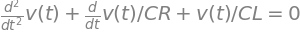

In [36]:
t = symbols('t', real=True)

L_for_de = symbols('L', real=True, positive=True)
C_for_de = symbols('C', real=True, positive=True)
v = sp.Function('v')(t)
eq_diff_v_presub = sp.Eq(sp.diff(v, t, 2) + (1/(R*C_for_de)) * sp.diff(v, t) + (1/(L_for_de*C_for_de)) * v, 0)

display(eq_diff_v_presub)

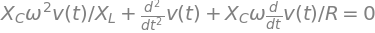

In [37]:
eq_diff_v = sp.Eq(sp.diff(v, t, 2) + (1/(R*C)) * sp.diff(v, t) + (1/(L*C)) * v, 0)

display(eq_diff_v)

**Output (Symbolic):**

$$ \frac{d^{2}}{d t^{2}} v\left(t \right) + \frac{V_{llrms}^{2} \omega \frac{d}{d t} v\left(t \right)}{Q_{c3ph} R} + \frac{V_{llrms}^{2} \omega^{2} v\left(t \right)}{Q_{c3ph} X_{L}} = 0 $$

## Step 5: Laplace-Domain Solution

Unilateral Laplace $(t\geq 0)$ Transform DE:
$$
s^2 V\left(s\right) - s v\left(0\right) - v^{\prime}\left(0\right) + \frac{1}{R C} \left[s V\left(s\right) - v\left(0\right)\right] + \frac{1}{L C} V \left(s\right) = 0
$$

$$
V\left(s\right) = \frac{\left[s v\left(0\right) + v^\prime\left(0\right)\right]}{\left[s^2 + \frac{1}{R C} s + \frac{1}{L C}\right]} 
$$

For $i_{L}\left(s\right)$: 
$$
i_{L}\left(s\right) = \frac{\left[s I_{L}\left(0\right) + \frac{v(0)}{L}\right]}{\left[s² + \frac{1}{R C} s + \frac{1}{L C}\right]}
$$

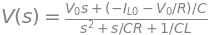

In [38]:
s = symbols('s')
I_L0 = symbols('I_{L0}')
V0 = symbols('V_0')
V_s = sp.Function('V')(s)
denom = s**2 + (1/(R*C_for_de))*s + 1/(L_for_de*C_for_de)
dv0_sym = (-V0 / R - I_L0) / C_for_de  # From Step 3 symbolic
V_s_sol_for_de = (s * V0 + dv0_sym) / denom

display(sp.Eq(V_s, V_s_sol_for_de))

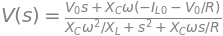

In [39]:
V_s = sp.Function('V')(s)
denom = s**2 + (1/(R*C))*s + 1/(L*C)
dv0_sym = (-V0 / R - I_L0) / C  # From Step 3 symbolic
V_s_sol = (s * V0 + dv0_sym) / denom

display(sp.Eq(V_s, V_s_sol))

**Output (Symbolic):**

$$ 
V\left(s \right) = \frac{V_{0} s + \frac{V_{llrms}^{2} \omega \left(- I_{L0} - \frac{V_{0}}{R}\right)}{Q_{c3ph}}}{s^{2} + \frac{V_{llrms}^{2} \omega s}{Q_{c3ph} R} + \frac{V_{llrms}^{2} \omega^{2}}{Q_{c3ph} X_{L}}} 
$$

Simplified: 
$$
V\left(s\right) = \frac{\left[s V_0 + v^\prime\left(0\right)\right]}{\left[s^2 + \frac{1}{R C} s + {\omega_0}^2\right]}
$$

## Step 6: Inverse Laplace Transform (Time-Domain Responses)

Underdamped: 
$$
v(t) = e^{-\alpha t} [A\;cos(\omega_d t) + B\;sin(\omega_d t)]
$$

$$
A = V_0
$$

$$
B = \frac{\left[v^{\prime}\left(0\right) + \alpha V_0\right]}{\omega_d}
$$

$$
i_L\left(t\right) = e^{-\alpha t} [D\;cos(\omega_d t) + E\;sin(\omega_d t)]
$$

$$
D = I_{L0}
$$

$$
E = \frac{\left[\frac{V_0}{L} + \alpha I_{L0}\right]}{\omega_d}
$$

In [40]:
alpha = 1 / (2 * R * C)
alpha

In [41]:
omega0 = 1 / sqrt(L * C)
omega0

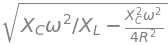

In [42]:
omegad = sqrt(omega0**2 - alpha**2)
omegad

In [43]:
zeta = alpha / omega0
zeta

In [44]:
A = V0
A

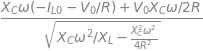

In [45]:
B = (dv0_sym + alpha * V0) / omegad
B

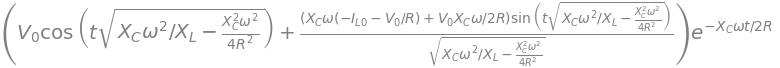

In [46]:
v_standard = exp(-alpha * t) * (A * cos(omegad * t) + B * sin(omegad * t))
v_standard

In [47]:
D = I_L0
D

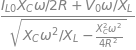

In [48]:
E = (V0 / L + alpha * I_L0) / omegad
E

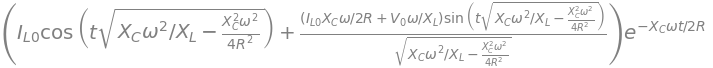

In [49]:
i_L_standard = exp(-alpha * t) * (D * cos(omegad * t) + E * sin(omegad * t))
i_L_standard

### Show Symbolic Equations

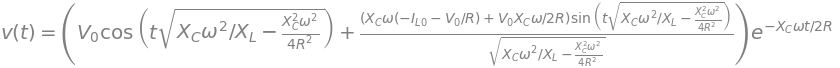

In [50]:
display(sp.Eq(sp.Function('v')(t), v_standard))

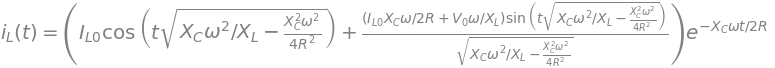

In [51]:
display(sp.Eq(sp.Function('i_L')(t), i_L_standard))

### Evaluate Numerically

In [52]:
subs_num_full = numerical_subs.copy()
subs_num_full

In [53]:
subs_num_full.update({R:1, XL:1, XC:Xc_num, V0:v0_num, I_L0:i_L0_num, C:C_num, L:L_num})
subs_num_full

In [54]:
alpha_num = float(alpha.subs(subs_num_full).doit().evalf())
alpha_num

In [55]:
omega0_num = float(omega0.subs(subs_num_full).doit().evalf())
omega0_num

In [56]:
omegad_num = float(omegad.subs(subs_num_full).doit().evalf())
omegad_num

In [57]:
zeta_num = float(zeta.subs(subs_num_full).doit().evalf())
zeta_num

In [58]:
A_num = v0_num
A_num

In [59]:
B_num = (dv0_num + alpha_num * v0_num) / omegad_num
B_num

In [60]:
D_num = i_L0_num
D_num

In [61]:
E_num = (v0_num / L_num + alpha_num * i_L0_num) / omegad_num
E_num

In [62]:
print(f'$5$')

$5$


In [63]:
print(f"alpha = {alpha_num:.1f} [rad/s]")
print(f"omega_0 = {omega0_num:.1f} [rad/s]")
print(f"zeta = {zeta_num:.3f}")
print(f"omega_d = {omegad_num:.1f} [rad/s]")
print(f"A = {A_num:.0f} [V], B = {B_num:.0f} [V]")
print(f"D = {D_num:.0f} [A], E = {E_num:.0f} [A]")

alpha = 565.5 [rad/s]
omega_0 = 653.0 [rad/s]
zeta = 0.866
omega_d = 326.5 [rad/s]
A = -7845 [V], B = -27175 [V]
D = 11767 [A], E = 11323 [A]


**Output (Symbolic):**

$$ 
v\left(t \right) = \left(V_{0} \cos\left(t \sqrt{\frac{V_{llrms}^{2} \omega^{2}}{Q_{c3ph} X_{L}} - \frac{V_{llrms}^{4} \omega^{2}}{4 Q_{c3ph}^{2} R^{2}}}\right) + \frac{\left(\frac{V_{llrms}^{2} \omega \left(- I_{L0} - \frac{V_{0}}{R}\right)}{Q_{c3ph}} + \frac{V_{0} V_{llrms}^{2} \omega}{2 Q_{c3ph} R}\right) \sin\left(t \sqrt{\frac{V_{llrms}^{2} \omega^{2}}{Q_{c3ph} X_{L}} - \frac{V_{llrms}^{4} \omega^{2}}{4 Q_{c3ph}^{2} R^{2}}}\right)}{\sqrt{\frac{V_{llrms}^{2} \omega^{2}}{Q_{c3ph} X_{L}} - \frac{V_{llrms}^{4} \omega^{2}}{4 Q_{c3ph}^{2} R^{2}}}}\right) e^{- \frac{V_{llrms}^{2} \omega t}{2 Q_{c3ph} R}}
$$

$$
i_{L}\left(t \right) = \left(I_{L0} \cos\left(t \sqrt{\frac{V_{llrms}^{2} \omega^{2}}{Q_{c3ph} X_{L}} - \frac{V_{llrms}^{4} \omega^{2}}{4 Q_{c3ph}^{2} R^{2}}}\right) + \frac{\left(\frac{I_{L0} V_{llrms}^{2} \omega}{2 Q_{c3ph} R} + \frac{V_{0} \omega}{X_{L}}\right) \sin\left(t \sqrt{\frac{V_{llrms}^{2} \omega^{2}}{Q_{c3ph} X_{L}} - \frac{V_{llrms}^{4} \omega^{2}}{4 Q_{c3ph}^{2} R^{2}}}\right)}{\sqrt{\frac{V_{llrms}^{2} \omega^{2}}{Q_{c3ph} X_{L}} - \frac{V_{llrms}^{4} \omega^{2}}{4 Q_{c3ph}^{2} R^{2}}}}\right) e^{- \frac{V_{llrms}^{2} \omega t}{2 Q_{c3ph} R}}
$$

**Numerical:** <br>
$\alpha$ = $565.5\;\left[\frac{rad}{s}\right]$ <br>
$\omega_0$ = $653.0\;\left[\frac{rad}{s}\right]$ <br>
$\omega_d$ = $326.5\;\left[\frac{rad}{s}\right]$ <br>
$\zeta$ = $0.866$

$A$ = -7845 $\left[V\right]$, B = -27175 $\left[V\right]$  
$D$ = 11767 $\left[A\right]$, E = 11323 $\left[A\right]$

## Step 7: Numerical Simulation and Plots

Lambdify for evaluation. t=0 to 0.1 s, dt=1 μs. Verify ICs via eval at t=0.

In [64]:
v_func = lambda tt: np.exp(-alpha_num * tt) * (A_num * np.cos(omegad_num * tt) + B_num * np.sin(omegad_num * tt))
v_func

<function __main__.<lambda>(tt)>

In [65]:
i_L_func = lambda tt: np.exp(-alpha_num * tt) * (D_num * np.cos(omegad_num * tt) + E_num * np.sin(omegad_num * tt))
i_L_func

<function __main__.<lambda>(tt)>

In [66]:
t_num = np.arange(0, 0.04, 1e-4)

In [67]:
v_plot = v_func(t_num)

In [68]:
i_L_plot = i_L_func(t_num)

### Verify Results

In [70]:
print(f"v_C(0) = {v_plot[0]:.0f} V (should be {v0_num:.0f} V)")

v_C(0) = -7845 V (should be -7845 V)


In [71]:
print(f"i_L(0) = {i_L_plot[0]:.0f} A (should be {i_L0_num:.0f} A)")

i_L(0) = 11767 A (should be 11767 A)


In [72]:
dv_plot_0 = np.gradient(v_plot, t_num)[0]
print(f"dv_C/dt(0) ≈ {dv_plot_0:.2e} V/s (should be {dv0_num:.2e} V/s)")

dv_C/dt(0) ≈ -4.03e+06 V/s (should be -4.44e+6 V/s)


In [ ]:
# Numerical Simulation and Plots

# Extended plots: Steady-state pre-switching (t < 0) and transients post-switching (t >= 0).
# Time: -0.1 to 0.1 s (few cycles before/after), dt=1 μs.
# Steady-state:
# - Source voltage v_s(t) = sqrt(2) V_ph_rms cos(ω t + θ)
# - Source current i_total(t) = sqrt(2) |I_total| cos(ω t + θ + ∠Y_total)
# - Steady-state v_C(t) = v_s(t) (parallel, directly across source)
# - Steady-state i_L(t) = sqrt(2) |I_L_rms| cos(ω t + θ + ∠I_L)
# Annotate t=0 with vertical line "Switch Opens".

# Lambdify transients (post t=0)
v_trans_func = lambda tt: np.exp(-alpha_num * tt) * (A_num * np.cos(omegad_num * tt) + B_num * np.sin(omegad_num * tt))
i_L_trans_func = lambda tt: np.exp(-alpha_num * tt) * (D_num * np.cos(omegad_num * tt) + E_num * np.sin(omegad_num * tt))

In [75]:
# Time vector: -0.1 to 0.1 s
t_num = np.arange(-0.1, 0.1, 1e-4)
switch_time = 0  # t=0

In [76]:
# Steady-state functions (for t < 0)
V_ph_peak = np.sqrt(2) * 10000
V_ph_peak

In [77]:
I_total_peak = np.sqrt(2) * I_total_mag
I_total_peak

In [78]:
I_L_peak = np.sqrt(2) * i_L0_num
I_L_peak

In [79]:
angle_I_L = float(arg(I_L_rms.subs(subs_num)).doit().evalf() * 180 / pi)
print("Computed angle_I_L = {:.2f} deg".format(angle_I_L))

Computed angle_I_L = 33.69 deg


v_C(-) ≈ -7396 V, v_C(0+) = -7845 V
i_L(-) ≈ -15109 A, i_L(0+) = 11767 A
dv_C/dt(0) ≈ -4.26e+06 V/s (should be -4.44e+6)


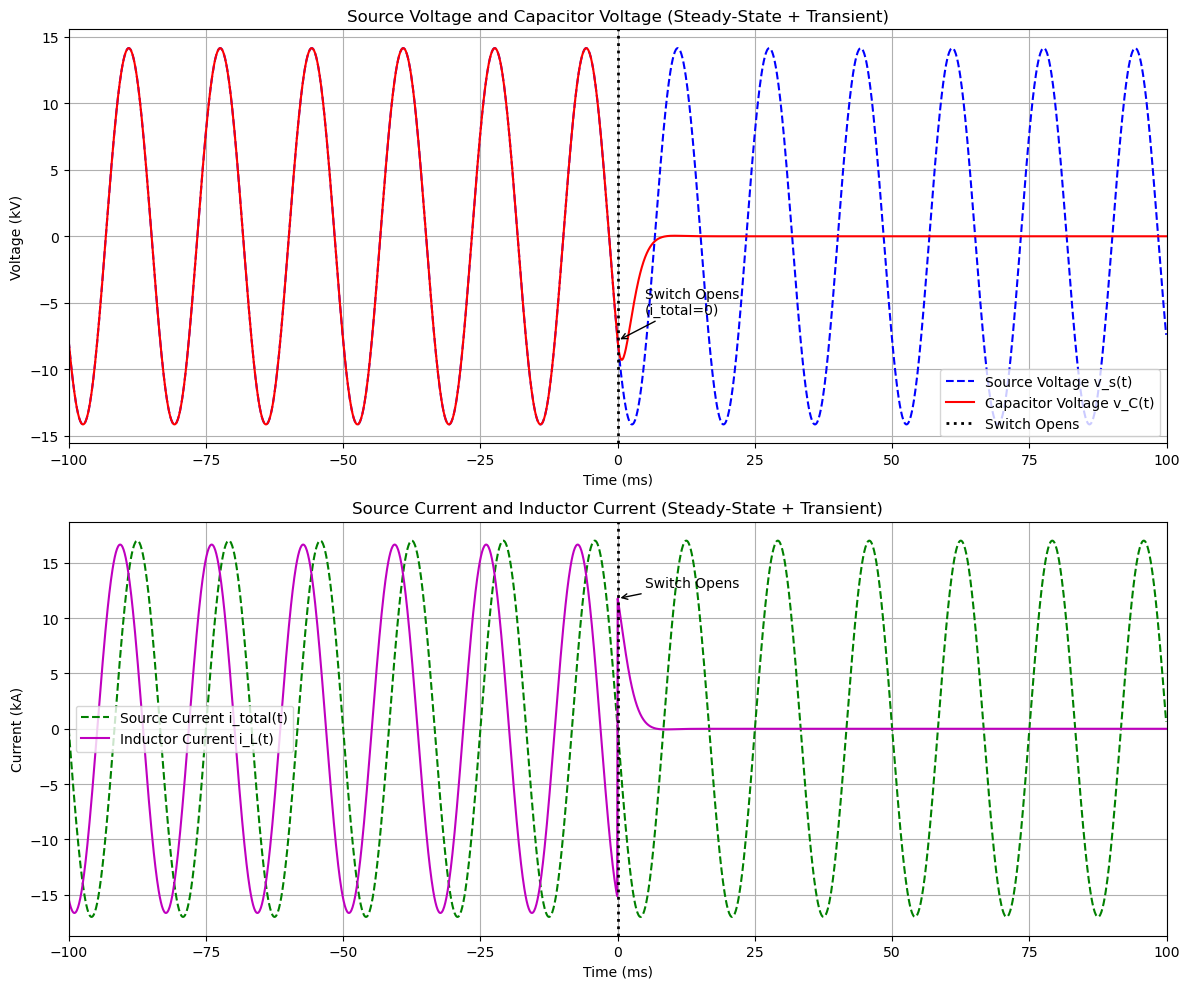

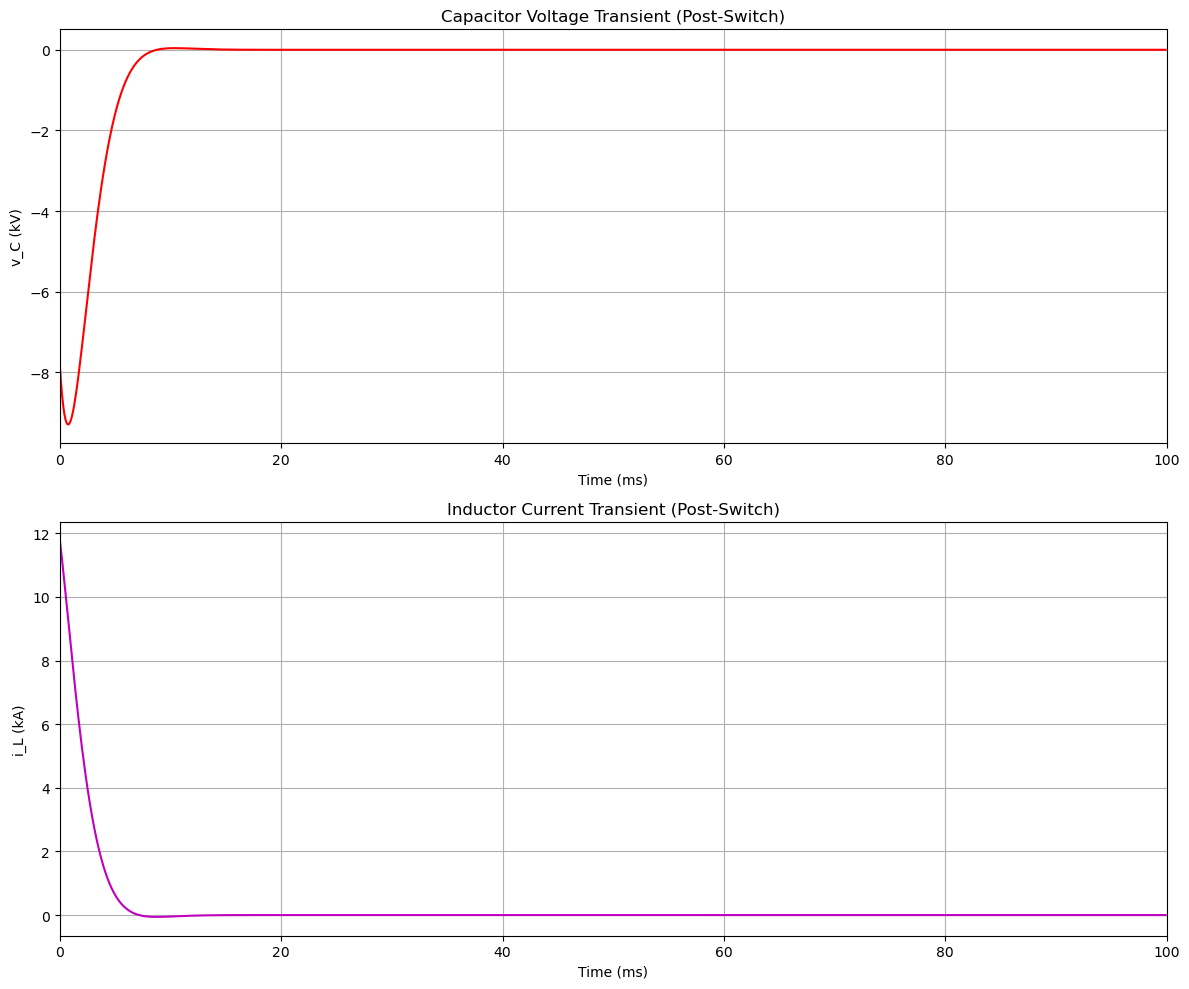

In [80]:
# Numerical omega
omega_num = 377.0

v_s_ss = lambda tt: V_ph_peak * np.cos(omega_num * tt + theta_num * np.pi / 180)
i_total_ss = lambda tt: I_total_peak * np.cos(omega_num * tt + theta_num * np.pi / 180 + angle_Y_num * np.pi / 180)
v_C_ss = v_s_ss  # Same as source
i_L_ss = lambda tt: I_L_peak * np.cos(omega_num * tt + theta_num * np.pi / 180 + angle_I_L * np.pi / 180)

# Combined waveforms
v_C_combined = np.where(t_num < switch_time, v_C_ss(t_num), v_trans_func(t_num))
i_L_combined = np.where(t_num < switch_time, i_L_ss(t_num), i_L_trans_func(t_num))

# Verify ICs (continuity at t=0)
idx_switch = np.argmin(np.abs(t_num - switch_time))
print(f"v_C(-) ≈ {v_C_ss(t_num[idx_switch-1]):.0f} V, v_C(0+) = {v_trans_func(t_num[idx_switch]):.0f} V")
print(f"i_L(-) ≈ {i_L_ss(t_num[idx_switch-1]):.0f} A, i_L(0+) = {i_L_trans_func(t_num[idx_switch]):.0f} A")
dv_plot_0 = np.gradient(v_C_combined, t_num)[idx_switch]
print(f"dv_C/dt(0) ≈ {dv_plot_0:.2e} V/s (should be {dv0_num:.2e})")

# Plots: 2 figures - one for voltages (source/v_C), one for currents (source/i_total, i_L)
fig1, (ax1a, ax1b) = plt.subplots(2, 1, figsize=(12, 10))
# Source voltage and v_C
ax1a.plot(t_num * 1000, v_s_ss(t_num) / 1000, 'b--', linewidth=1.5, label='Source Voltage v_s(t)')
ax1a.plot(t_num * 1000, v_C_combined / 1000, 'r-', linewidth=1.5, label='Capacitor Voltage v_C(t)')
ax1a.axvline(x=switch_time * 1000, color='k', linestyle=':', linewidth=2, label='Switch Opens')
ax1a.annotate('Switch Opens\n(i_total=0)', xy=(0, v0_num / 1000), xytext=(5, v0_num / 1000 + 2),
              arrowprops=dict(arrowstyle='->', color='black'), fontsize=10)
ax1a.grid(True)
ax1a.set_xlabel('Time (ms)')
ax1a.set_ylabel('Voltage (kV)')
ax1a.set_title('Source Voltage and Capacitor Voltage (Steady-State + Transient)')
ax1a.set_xlim([-100, 100])
ax1a.legend()

# Source current and i_L (steady-state only for i_total, as post-switch no source current)
ax1b.plot(t_num * 1000, i_total_ss(t_num) / 1000, 'g--', linewidth=1.5, label='Source Current i_total(t)')
ax1b.plot(t_num * 1000, i_L_combined / 1000, 'm-', linewidth=1.5, label='Inductor Current i_L(t)')
ax1b.axvline(x=switch_time * 1000, color='k', linestyle=':', linewidth=2)
ax1b.annotate('Switch Opens', xy=(0, i_L0_num / 1000), xytext=(5, i_L0_num / 1000 + 1),
              arrowprops=dict(arrowstyle='->', color='black'), fontsize=10)
ax1b.grid(True)
ax1b.set_xlabel('Time (ms)')
ax1b.set_ylabel('Current (kA)')
ax1b.set_title('Source Current and Inductor Current (Steady-State + Transient)')
ax1b.set_xlim([-100, 100])
ax1b.legend()

plt.tight_layout()
plt.show()

# Additional plot: Zoom on transients post-switch (t=0 to 0.1 s)
fig2, (ax2a, ax2b) = plt.subplots(2, 1, figsize=(12, 10))
ax2a.plot(t_num[t_num >= 0] * 1000, v_C_combined[t_num >= 0] / 1000, 'r-', linewidth=1.5)
ax2a.grid(True)
ax2a.set_xlabel('Time (ms)')
ax2a.set_ylabel('v_C (kV)')
ax2a.set_title('Capacitor Voltage Transient (Post-Switch)')
ax2a.set_xlim([0, 100])

ax2b.plot(t_num[t_num >= 0] * 1000, i_L_combined[t_num >= 0] / 1000, 'm-', linewidth=1.5)
ax2b.grid(True)
ax2b.set_xlabel('Time (ms)')
ax2b.set_ylabel('i_L (kA)')
ax2b.set_title('Inductor Current Transient (Post-Switch)')
ax2b.set_xlim([0, 100])

plt.tight_layout()
plt.show()

### Compare to Simulation

[](Extra_Credit_Circuit_Sim)